### Air Quality Classification for Indian Cities (2015- 2020) : Exploratory Data Analysis

Kaggle Dataset link: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india

Used Dataset: 'city_day.csv'

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# reading data
df=pd.read_csv(r"city_day.csv",parse_dates=True,index_col='Date')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


In [6]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


# Analysis of Variance (ANOVA) to check if 'AQI' and 'AQI_Bucket' columns are the same

In [7]:
# Using f_oneway from scipy.stats to perform ANOVA
# This tests if there's a significant difference in 'AQI' values among different 'AQI_Bucket' categories
from scipy.stats import f_oneway
# ANOVA
m1=df['AQI_Bucket']=='Moderate' 
m2=df['AQI_Bucket']=='Satisfactory'
m3=df['AQI_Bucket']=='Poor'
m4=df['AQI_Bucket']=='Very Poor' 
m5=df['AQI_Bucket']=='Good'
m6=df['AQI_Bucket']=='Severe'

f_oneway(df[m1]['AQI'],df[m2]['AQI'],df[m3]['AQI'],df[m4]['AQI'],df[m5]['AQI'],df[m6]['AQI'])

F_onewayResult(statistic=21992.753952732455, pvalue=0.0)

In [8]:
# since p value is 0 we can asume that AQI and AQI_Bucket are nothing but same colums

In [9]:
# checking for missing values
df.isna().sum()

City              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [10]:
# Creating a mask to identify columns with correlation coefficients <= 0.2
mask=df.corr()<=0.2
df.corr()[mask]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,NaN,NaN,NaN,NaN,NaN,NaN,0.089912,0.132325,0.161238,0.023911,0.117080,0.114579,NaN
PM10,NaN,NaN,NaN,NaN,NaN,NaN,0.112588,NaN,NaN,0.022265,0.169335,0.081700,NaN
NO,NaN,NaN,NaN,NaN,NaN,0.185621,NaN,0.170322,0.014580,0.035771,0.150857,0.094237,NaN
NO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025260,NaN,0.171701,NaN
NOx,NaN,NaN,NaN,NaN,NaN,0.166224,NaN,NaN,0.093170,0.039121,0.189386,0.087398,NaN
NH3,NaN,NaN,0.185621,NaN,0.166224,NaN,0.104891,-0.038998,0.094972,-0.015650,0.013227,-0.019813,NaN
CO,0.089912,0.112588,NaN,NaN,NaN,0.104891,NaN,NaN,0.041736,0.061861,NaN,0.154889,NaN
SO2,0.132325,NaN,0.170322,NaN,NaN,-0.038998,NaN,NaN,0.162142,0.036110,NaN,NaN,NaN
O3,0.161238,NaN,0.014580,NaN,0.093170,0.094972,0.041736,0.162142,NaN,0.020255,0.130209,0.111410,0.198991
Benzene,0.023911,0.022265,0.035771,0.025260,0.039121,-0.015650,0.061861,0.036110,0.020255,NaN,NaN,NaN,0.044407


In [11]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory


In [12]:
# since 'O3' ,'benzen' and 'Xylen' have less correlation with y. we will remove them
df=df.iloc[:,[0,1,2,3,4,5,6,7,8,11,13,14]]

In [13]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,AQI_Bucket
Date,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,5.50,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,16.40,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,10.14,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,18.89,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,12.07,41.0,Good
2020-06-28,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,2.21,70.0,Satisfactory
2020-06-29,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,0.01,68.0,Satisfactory


In [14]:
## Creating a mask to identify columns with correlation coefficients >= 0.70
mask=df.corr()>=0.70
df.corr()[mask]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
PM2.5,1.000000,0.846498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM10,0.846498,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803313
NO,NaN,NaN,1.00000,NaN,0.79489,NaN,NaN,NaN,NaN,NaN
NO2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
NOx,NaN,NaN,0.79489,NaN,1.00000,NaN,NaN,NaN,NaN,NaN
NH3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Toluene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
AQI,NaN,0.803313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   Toluene     21490 non-null  float64
 10  AQI         24850 non-null  float64
 11  AQI_Bucket  24850 non-null  object 
dtypes: float64(10), object(2)
memory usage: 2.9+ MB


In [16]:
# In 'PM2.5' and 'PM10' there is multicolinearity so will remove 'PM2.5' since PM10 has more corr with 'AQI'
# In 'NO' and 'NOx' there is multicolinearity so will remove NO since 'NOx' has more corr with 'AQI'
df=df.iloc[:,[0,2,4,5,6,7,8,9,10,11]]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM10        18391 non-null  float64
 2   NO2         25946 non-null  float64
 3   NOx         25346 non-null  float64
 4   NH3         19203 non-null  float64
 5   CO          27472 non-null  float64
 6   SO2         25677 non-null  float64
 7   Toluene     21490 non-null  float64
 8   AQI         24850 non-null  float64
 9   AQI_Bucket  24850 non-null  object 
dtypes: float64(8), object(2)
memory usage: 2.5+ MB


In [18]:
# checking for missing values again
df.isna().sum()

City              0
PM10          11140
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
Toluene        8041
AQI            4681
AQI_Bucket     4681
dtype: int64

In [19]:
# Counting the occurrences of each category in the 'AQI_Bucket' column
df['AQI_Bucket'].value_counts()

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

In [20]:
df=df.drop(['NH3','Toluene'],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM10        18391 non-null  float64
 2   NO2         25946 non-null  float64
 3   NOx         25346 non-null  float64
 4   CO          27472 non-null  float64
 5   SO2         25677 non-null  float64
 6   AQI         24850 non-null  float64
 7   AQI_Bucket  24850 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.0+ MB


In [22]:
df.isna().sum()

City              0
PM10          11140
NO2            3585
NOx            4185
CO             2059
SO2            3854
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
# Handling missing values by filling them with the mean values of their respective columns

In [23]:
df['PM10'].fillna(value=df['PM10'].mean(),inplace=True)
df['NO2'].fillna(value=df['NO2'].mean(),inplace=True)
df['NOx'].fillna(value=df['NOx'].mean(),inplace=True)
df['CO'].fillna(value=df['CO'].mean(),inplace=True)
df['SO2'].fillna(value=df['SO2'].mean(),inplace=True)

In [24]:
# Checking for missing values in the DataFrame after filling missing values
df.isna().sum()

City             0
PM10             0
NO2              0
NOx              0
CO               0
SO2              0
AQI           4681
AQI_Bucket    4681
dtype: int64

In [25]:
# Removing rows with any remaining missing values
df.dropna(inplace=True)

In [26]:
df.isna().sum()

City          0
PM10          0
NO2           0
NOx           0
CO            0
SO2           0
AQI           0
AQI_Bucket    0
dtype: int64

In [27]:
# Extracting feature columns (X) and the target column (y)
X=df.iloc[:,1:6].values
y=df.iloc[:,-1].values


In [28]:
# Scaling the feature columns
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()

In [30]:
X_sc=sc.fit_transform(X)

In [31]:
X_sc

array([[-3.09273670e-03, -1.07161505e-02,  4.83876096e-02,
         6.54140048e-01,  2.04200840e+00],
       [-3.09273670e-03, -1.19440435e-02,  2.97521283e-01,
         1.64109841e+00,  1.98217648e+00],
       [-3.09273670e-03,  1.50956431e-01,  6.87808139e-01,
         3.14435580e+00,  3.08006320e+00],
       ...,
       [-6.95635824e-01,  2.28462587e-02, -4.72559026e-01,
        -2.65785015e-01, -3.45459558e-01],
       [-9.03938926e-01,  1.17952216e-02, -4.56649675e-01,
        -2.60080053e-01, -2.62972830e-01],
       [-6.92067180e-01, -8.68455177e-02, -6.17435673e-01,
        -2.50096371e-01, -7.12583584e-01]])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19880, 5), (4970, 5), (19880,), (4970,))

In [34]:
# importing Support Vector Model
from sklearn.svm import SVC

In [35]:
# Creating an SVM model with the radial basis function (RBF) kernel
model=SVC(kernel='rbf')
# Training the SVM model on the training data
model.fit(X_train,y_train)

SVC()

In [36]:
# Making predictions on the test data
y_pred=model.predict(X_test)
print(y_pred)

['Moderate' 'Moderate' 'Satisfactory' ... 'Moderate' 'Moderate' 'Moderate']


In [37]:
# Calculating the accuracy score
model.score(X_test,y_test)

0.6142857142857143

In [38]:
# Romoving the outliers 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24850 entries, 2015-01-29 to 2020-07-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   PM10        24850 non-null  float64
 2   NO2         24850 non-null  float64
 3   NOx         24850 non-null  float64
 4   CO          24850 non-null  float64
 5   SO2         24850 non-null  float64
 6   AQI         24850 non-null  float64
 7   AQI_Bucket  24850 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


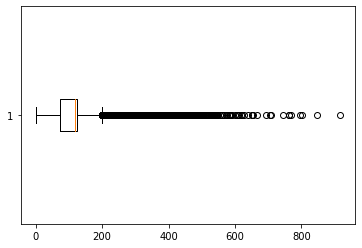

In [40]:
# checking for outliers in column 1
plt.boxplot(df.iloc[:,1],vert=False);

In [41]:
q3=np.percentile(df.iloc[:,1],75)
q1=np.percentile(df.iloc[:,1],25)
iqr=q3-q1
u_b=q3+1.5*iqr

In [42]:
u_b

199.72375

In [43]:
df.describe()

,PM10,NO2,NOx,CO,SO2,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,118.361096,28.971818,32.290515,2.343536,14.367049,166.463581
std,75.660501,24.432587,29.542968,7.011582,17.215237,140.696585
min,0.030000,0.010000,0.000000,0.000000,0.010000,13.000000
25%,71.780000,12.090000,14.030000,0.590000,5.790000,81.000000
50%,118.127103,22.535000,25.720000,0.950000,9.430000,118.000000
75%,122.957500,37.910000,38.170000,1.530000,14.890000,208.000000
max,917.080000,362.210000,378.240000,175.810000,186.080000,2049.000000


In [44]:
# Checking skewness and 90th percentile for column 1
print(df.iloc[:,1].skew())

2.289372157324728


In [45]:
print(df.iloc[:,1].quantile(0.90))

198.5050000000001


In [46]:
df.iloc[:,1]=np.where(df.iloc[:,1]>u_b,u_b,df.iloc[:,1])

In [47]:
print(df.iloc[:,1].skew())

0.17725911518006135


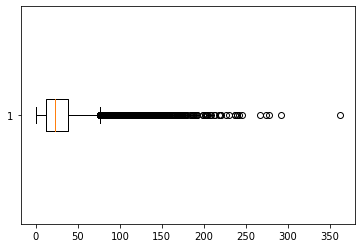

In [48]:
# checking for outliers in column 2
plt.boxplot(df.iloc[:,2],vert=False);

In [49]:
q3=np.percentile(df.iloc[:,2],75)
q1=np.percentile(df.iloc[:,2],25)
iqr=q3-q1
u_b=q3+1.5*iqr

In [50]:
df.iloc[:,2]=np.where(df.iloc[:,2]>u_b,u_b,df.iloc[:,2])

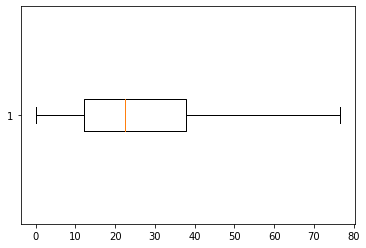

In [51]:
plt.boxplot(df.iloc[:,2],vert=False);

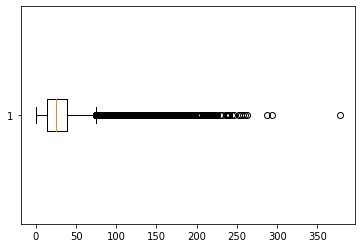

In [52]:
# checking for outliers in column 3
plt.boxplot(df.iloc[:,3],vert=False);

In [53]:
q3=np.percentile(df.iloc[:,3],75)
q1=np.percentile(df.iloc[:,3],25)
iqr=q3-q1
u_b=q3+1.5*iqr

In [54]:
df.iloc[:,3]=np.where(df.iloc[:,3]>u_b,u_b,df.iloc[:,3])

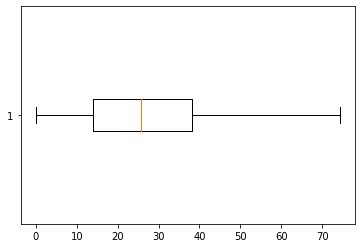

In [55]:
plt.boxplot(df.iloc[:,3],vert=False);

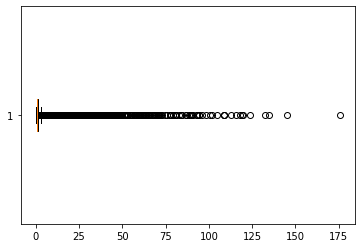

In [56]:
# checking for outliers in column 4
plt.boxplot(df.iloc[:,4],vert=False);

In [57]:
q3=np.percentile(df.iloc[:,4],75)
q1=np.percentile(df.iloc[:,4],25)
iqr=q3-q1
u_b=q3+1.5*iqr

In [58]:
df.iloc[:,4]=np.where(df.iloc[:,4]>u_b,u_b,df.iloc[:,4])

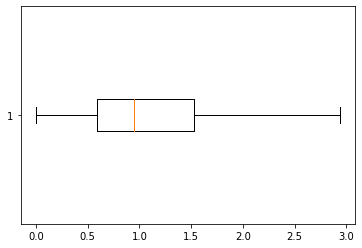

In [59]:
plt.boxplot(df.iloc[:,4],vert=False);

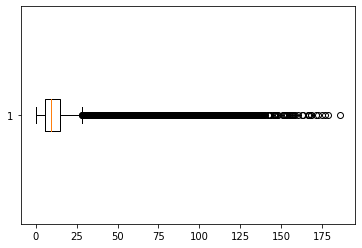

In [60]:
# checking for outliers in column 5
plt.boxplot(df.iloc[:,5],vert=False);

In [61]:
q3=np.percentile(df.iloc[:,5],75)
q1=np.percentile(df.iloc[:,5],25)
iqr=q3-q1
u_b=q3+1.5*iqr

In [62]:
df.iloc[:,5]=np.where(df.iloc[:,5]>u_b,u_b,df.iloc[:,5])

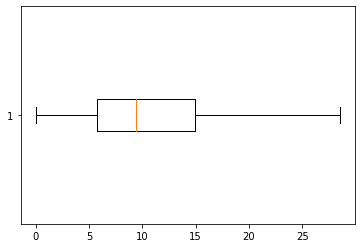

In [63]:
plt.boxplot(df.iloc[:,5],vert=False);

In [67]:
df

,City,PM10,NO2,NOx,CO,SO2,AQI,AQI_Bucket
Date,,,,,,,,
2015-01-29,Ahmedabad,118.127103,28.71,33.72,2.94,28.54,209.0,Poor
2015-01-30,Ahmedabad,118.127103,28.68,41.08,2.94,28.54,328.0,Very Poor
2015-01-31,Ahmedabad,118.127103,32.66,52.61,2.94,28.54,514.0,Severe
2015-02-01,Ahmedabad,118.127103,42.08,74.38,2.94,28.54,782.0,Severe
2015-02-02,Ahmedabad,118.127103,35.31,72.80,2.94,28.54,914.0,Severe
...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,50.940000,25.06,19.54,0.47,8.55,41.0,Good
2020-06-28,Visakhapatnam,74.090000,26.06,16.53,0.52,12.72,70.0,Satisfactory
2020-06-29,Visakhapatnam,65.730000,29.53,18.33,0.48,8.42,68.0,Satisfactory


In [64]:
# Extracting feature columns (X) and the target column (y) after outlier removal
X=df.iloc[:,1:6].values
y=df.iloc[:,-1].values

In [65]:
# Scaling the feature columns again after outlier removal

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_sc=sc.fit_transform(X)

X_sc

array([[ 0.1905674 ,  0.05302815,  0.21010528,  2.20178063,  2.1479357 ],
       [ 0.1905674 ,  0.05150117,  0.56890615,  2.20178063,  2.1479357 ],
       [ 0.1905674 ,  0.25407992,  1.13099502,  2.20178063,  2.1479357 ],
       ...,
       [-0.88410766,  0.09476547, -0.54015905, -0.84341368, -0.41861593],
       [-1.20734842,  0.0810227 , -0.51724649, -0.79389832, -0.23747759],
       [-0.87856991, -0.04164433, -0.74880956, -0.70724645, -1.22480908]])

In [66]:
# Applying the model to data once again after outlier removal
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=123)

In [69]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19880, 5), (4970, 5), (19880,), (4970,))

In [70]:
from sklearn.svm import SVC

In [71]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [72]:
y_pred=model.predict(X_test)

# Displaying the predicted labels after outlier removal
print(y_pred)

['Moderate' 'Moderate' 'Moderate' ... 'Moderate' 'Very Poor' 'Moderate']


In [73]:
# checking model score
model.score(X_test,y_test)

0.6394366197183099

In [74]:
# Plotting the confusion matrix to visualize the performance of the SVM model after outlier removal
from sklearn.metrics import plot_confusion_matrix,classification_report 

C:\Users\SAURABH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


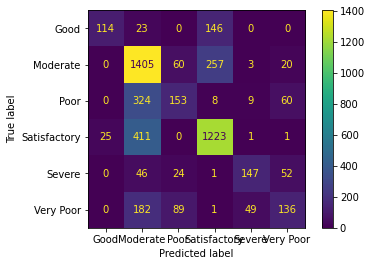

In [75]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()